# Brief introduction to legacy TCGA

**The Cancer Genome Atlas (TCGA)** contains **DNA**, **RNA**, **protein** and **epigenetic** measurements of a **large number of human tumors**.

Two versions of TCGA are available: legacy and Genomic Data Commons (GDC). **Legacy TCGA** is the original version. **GDC TCGA** is a standardized version of legacy TCGA. A few differences exist between both. *For instance, in legacy TCGA, genes are aligned on the hg19 human reference genome (GRCh37) whereas in GDC TCGA, they are aligned on the hg38 (GRCh38). In legacy TCGA, gene expression is reported as an estimated count by RSEM whereas in GDC TCGA, it is expressed in Fragments per Kilo base of transcript per Million mapped reads (FPKM). See [this publication](https://www.sciencedirect.com/science/article/pii/S2405471219302017?via%3Dihub) for more details.*

[Access to legacy TCGA](https://portal.gdc.cancer.gov/legacy-archive/search/f)

### Citation

When using any data from TCGA, acknowledge the TCGA Research Network in the acknowledgements section of your work. E.g. "The results published or shown here are in whole or part based upon data generated by the TCGA Research Network: https://www.cancer.gov/tcga."

# Librairies

In [1]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)

import json
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *

set_pyplot()

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Path

In [2]:
name = 'BRCA-pam'
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

### Format the dataset

In [3]:
database = 'legacy'
cancer = 'BRCA'
label_name = 'PAM50Call_RNAseq'
assert label_name in get_possible_classes(database, cancer), f"The class has to be chosen within this list {get_possible_classes(database, cancer)}."

In [4]:
data = TCGA_dataset(data_path, database, cancer, label_name)

6356 weakly expressed genes are removed of the dataset.


### Describe the dataset

In [5]:
describe_dataset(data)

The dataset contains 5 classes. Here are the classes and their respective number of samples:
	Basal: 141
	Her2: 67
	LumA: 421
	LumB: 192
	Normal: 95
In total, there are 916 samples, each of them containing 13896 features.


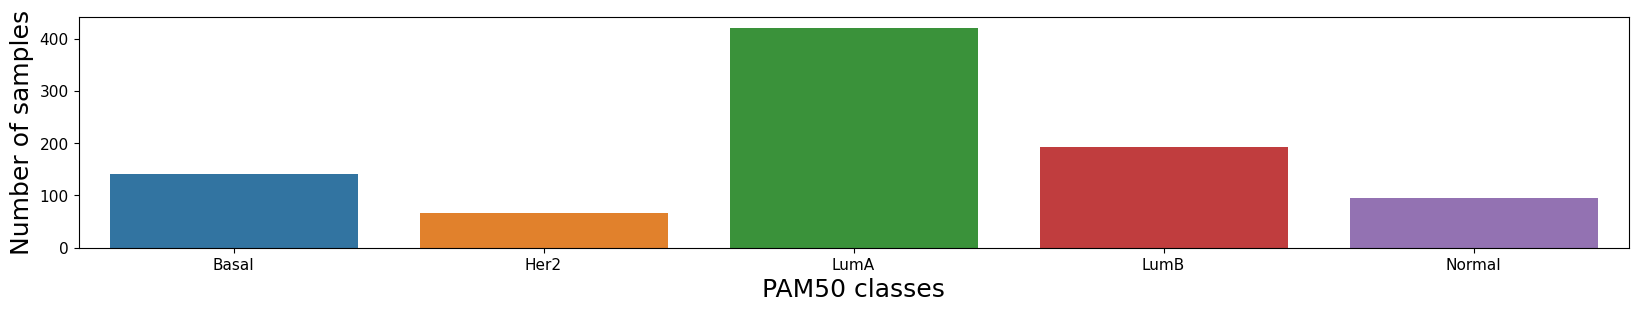

In [6]:
create_new_folder(save_path)
plot_class_imbalance(data, label_name, save_path)

In [7]:
# Each gene is represented by an expression such as 'Letters|Numbers'.
# The letters are the name of the gene, the numbers are its Entrez Gene Id.

# Code to find the index of a gene from its name.
# np.argwhere(np.array([gene.split('|')[0] for gene in data.genes_IDs]) == 'ACPP')

### Save the names of the genes to reuse them later

In [8]:
# json.dump(data.genes_IDs, open(os.path.join(save_path, "genesIds.txt"),'w'))
# genes_IDs = json.load(open(os.path.join(save_path, "genesIds.txt")))